In [1]:
import numpy as py
import pandas as pd


In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Cabin'].fillna('Unknown',inplace=True)

In [6]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Cabin_letter'] = df['Cabin'].str[0]
df=pd.get_dummies(df,columns=['Embarked','Cabin_letter'],drop_first=True)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['Age','Fare']]=scaler.fit_transform(df[['Age','Fare']])

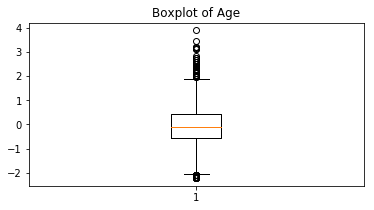

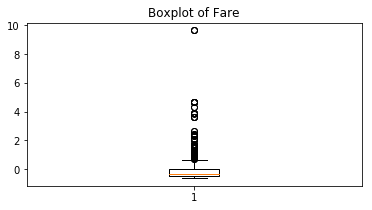

In [11]:
import matplotlib.pyplot as plt
numeric_cols = ['Age','Fare']
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    plt.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [12]:

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
